In [ ]:
# Initial Import of Dependencies
from config import db_key
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import psycopg2 as pg
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#connect to database
engine = pg.connect(db_key)
results_df = pd.read_sql('select * from learning_survey_results', con=engine)

In [3]:
results_df.head()

,program_id,program_name,employee_first_name,employee_last_name,business_unit_corporate_function,location,career_grade,talent_review_status,number_of_years_with_business,gender,ethnicity,nps_score,nps_comments
0,621,iLead,Rory,Newall,Assessment & Qualifications,Middle East,F,Ready in 1 year,6 - 10 years,Male,White,1.0,None
1,621,iLead,Oliver,Paige,Assessment & Qualifications,"North America, United States",D,Performing to standard,Less than 2 years,Male,White,4.0,None
2,621,iLead,Patrick,Robotham,Assessment & Qualifications,"North America, Canada",E,Ready in 1 year,11 + years,Male,White,10.0,None
3,621,iLead,Torrie,Lyall,Assessment & Qualifications,"North America, United States",D,Ready now,Less than 2 years,Female,White,2.0,None
4,621,iLead,Julissa,Travill,Strategy,United Kingdom,E,Ready in 1 year,Less than 2 years,Male,White,3.0,None


In [4]:
# checking data types
results_df.dtypes

program_id                            int64
program_name                         object
employee_first_name                  object
employee_last_name                   object
business_unit_corporate_function     object
location                             object
career_grade                         object
talent_review_status                 object
number_of_years_with_business        object
gender                               object
ethnicity                            object
nps_score                           float64
nps_comments                         object
dtype: object

In [5]:
# checking overall numerical stats
results_df.describe()

,program_id,nps_score
count,1290.000000,1289.000000
mean,787.279070,4.627618
std,185.266335,3.018995
min,121.000000,0.000000
25%,621.000000,2.000000
50%,921.000000,4.000000
75%,921.000000,7.000000
max,921.000000,10.000000


In [6]:
# looking at number of participants in different career grades
results_df.career_grade.value_counts(dropna=False)

C2    346
E     330
D     322
F     139
C1    136
G      12
H       5
Name: career_grade, dtype: int64

In [7]:
# looking at number of participants in all programs and how they determine their "talent review status"
results_df.talent_review_status.value_counts(dropna=False)

Ready in 1 year           300
Ready now                 295
Aspire to move            288
Performing to standard    253
Coach                     154
Name: talent_review_status, dtype: int64

In [8]:
# Count of Participants in each program 
participants_per_program = results_df.program_name.value_counts(dropna=False)
participants_per_program

iManage                 801
iLead                   349
Lead to Succeed         105
Mck Asian Leadership     22
McK Black Leadership     13
Name: program_name, dtype: int64

<AxesSubplot:>

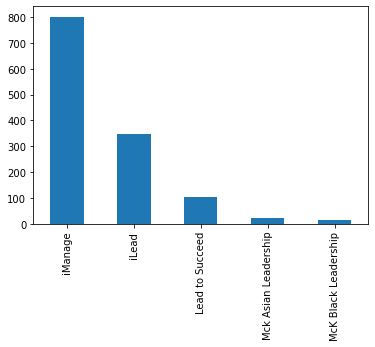

In [9]:
# bar plot of participants per program
participants_per_program.plot.bar()

### NPS Scores Across Programs

highest avg: McK Black Leadership: 8.3, Mck Askian Leadership: 7.6


In [10]:
# Average nps_score per program
nps_stats_by_program_table = results_df.groupby('program_name')['nps_score'].describe()
nps_stats_by_program_table

,count,mean,std,min,25%,50%,75%,max
program_name,,,,,,,,
Lead to Succeed,105.0,2.457143,1.759745,0.0,1.0,2.0,4.0,8.0
McK Black Leadership,13.0,8.384615,1.938146,5.0,7.0,9.0,10.0,10.0
Mck Asian Leadership,22.0,7.636364,1.865615,5.0,6.0,8.0,9.0,10.0
iLead,349.0,5.446991,2.753404,0.0,3.0,5.0,8.0,10.0
iManage,800.0,4.411250,3.066166,0.0,2.0,4.0,7.0,10.0


<AxesSubplot:>

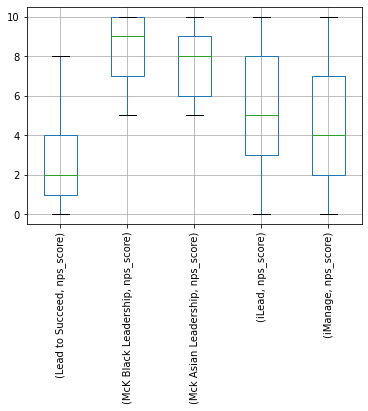

In [11]:
# Boxplot nps score per program
nps_stats_by_program_graph = results_df.groupby('program_name')
nps_stats_by_program_graph.boxplot(subplots=False, column='nps_score', rot=90)


In [12]:
# Count of talent review status by program
talent_review_by_program = results_df.groupby(['program_name', 'talent_review_status']).count()
talent_review_by_program = talent_review_by_program.reset_index(level=[0, 1])

In [13]:
talent_review_by_program = talent_review_by_program[['program_name', 'talent_review_status', 'program_id']]
talent_review_by_program.head()

,program_name,talent_review_status,program_id
0,Lead to Succeed,Aspire to move,33
1,Lead to Succeed,Performing to standard,11
2,Lead to Succeed,Ready in 1 year,29
3,Lead to Succeed,Ready now,32
4,McK Black Leadership,Aspire to move,3


In [37]:
talent_review_by_program['percentage'] = 0.0

# iManage                 801
# iLead                   349
# Lead to Succeed         105
# Mck Asian Leadership     22
# McK Black Leadership     13

In [49]:
# Include percentage column
# for index, row in df.iterrows():
#         print index
#         df['A-B']=df['A']-df['B']

for i, row in talent_review_by_program.iterrows():
    if row['program_name'] == 'iManage':
        percentage = (row['program_id']/801)*100
        talent_review_by_program.at[i,'percentage'] = percentage
    if row['program_name'] == 'iLead':
        percentage = (row['program_id']/349)*100
        talent_review_by_program.at[i,'percentage'] = percentage
    if row['program_name'] == 'Lead to Succeed':
        percentage = (row['program_id']/105)*100
        talent_review_by_program.at[i,'percentage'] = percentage
    if row['program_name'] == 'Mck Asian Leadership':
        percentage = (row['program_id']/22)*100
        talent_review_by_program.at[i,'percentage'] = percentage
    if row['program_name'] == 'McK Black Leadership':
        percentage = (row['program_id']/13)*100
        talent_review_by_program.at[i,'percentage'] = percentage
    else:
        pass

In [50]:
talent_review_by_program['percentage'] = talent_review_by_program['percentage'].round()

In [51]:
talent_review_by_program.head()

,program_name,talent_review_status,program_id,percentage
0,Lead to Succeed,Aspire to move,33,31.0
1,Lead to Succeed,Performing to standard,11,10.0
2,Lead to Succeed,Ready in 1 year,29,28.0
3,Lead to Succeed,Ready now,32,30.0
4,McK Black Leadership,Aspire to move,3,23.0


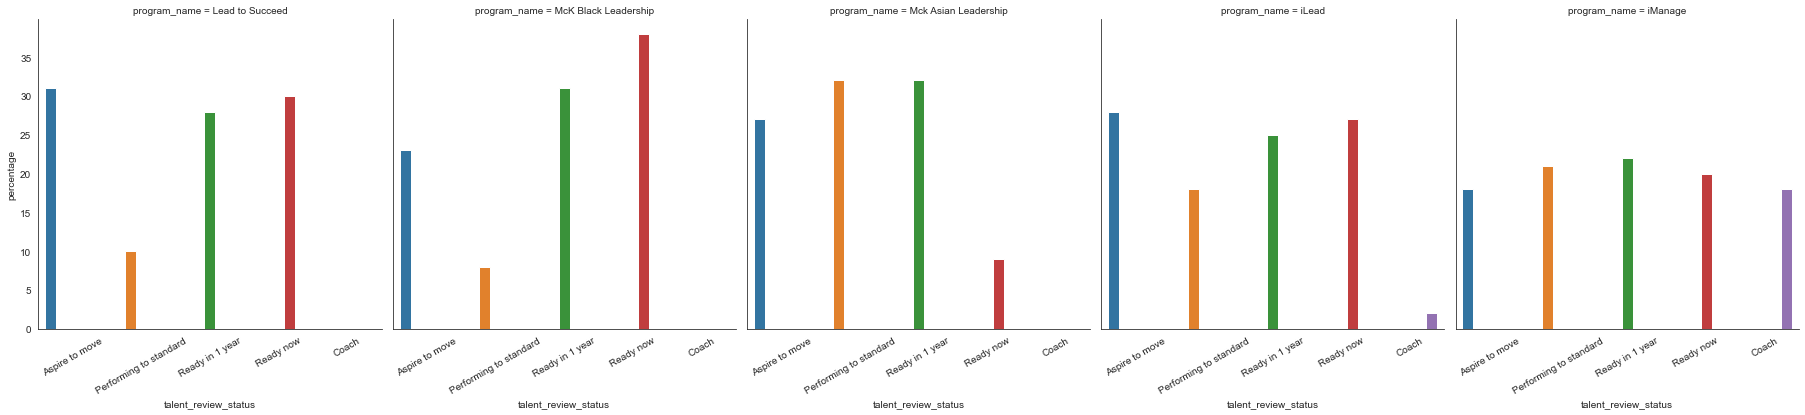

In [48]:
# graph of talent review status percentages for each graph
sns.set_style('white')


ax = sns.catplot(x='talent_review_status', y='percentage', hue='talent_review_status',
                     col='program_name', data=talent_review_by_program, kind='bar')
ax.set_xticklabels(rotation=30)



In [60]:
# Count of business_unit_corporate_function status by program
corp_funct_by_prgm_count = results_df.groupby(['program_name', 'business_unit_corporate_function']).count()
corp_funct_by_prgm_count = corp_funct_by_prgm_count.reset_index(level=[0, 1])
corp_funct_by_prgm_count = corp_funct_by_prgm_count[['program_name', 'talent_review_status', 'business_unit_corporate_function']]
corp_funct_by_prgm_count['percentage'] = 0.0
corp_funct_by_prgm_count.head()


,program_name,talent_review_status,business_unit_corporate_function,percentage
0,Lead to Succeed,32,Assessment & Qualifications,0.0
1,Lead to Succeed,1,CPO/DTC,0.0
2,Lead to Succeed,7,Corporate Marketing & Comms,0.0
3,Lead to Succeed,18,English Language Learning,0.0
4,Lead to Succeed,6,Finance,0.0


In [62]:
for i, row in corp_funct_by_prgm_count.iterrows():
    if row['program_name'] == 'iManage':
        percentage = (row['talent_review_status']/801)*100
        corp_funct_by_prgm_count.at[i,'percentage'] = percentage
    if row['program_name'] == 'iLead':
        percentage = (row['talent_review_status']/349)*100
        corp_funct_by_prgm_count.at[i,'percentage'] = percentage
    if row['program_name'] == 'Lead to Succeed':
        percentage = (row['talent_review_status']/105)*100
        corp_funct_by_prgm_count.at[i,'percentage'] = percentage
    if row['program_name'] == 'Mck Asian Leadership':
        percentage = (row['talent_review_status']/22)*100
        corp_funct_by_prgm_count.at[i,'percentage'] = percentage
    if row['program_name'] == 'McK Black Leadership':
        percentage = (row['talent_review_status']/13)*100
        corp_funct_by_prgm_count.at[i,'percentage'] = percentage
    else:
        pass

In [71]:
corp_funct_by_prgm_count.head()

,program_name,talent_review_status,business_unit_corporate_function,percentage
0,Lead to Succeed,32,Assessment & Qualifications,30.476190
1,Lead to Succeed,1,CPO/DTC,0.952381
2,Lead to Succeed,7,Corporate Marketing & Comms,6.666667
3,Lead to Succeed,18,English Language Learning,17.142857
4,Lead to Succeed,6,Finance,5.714286


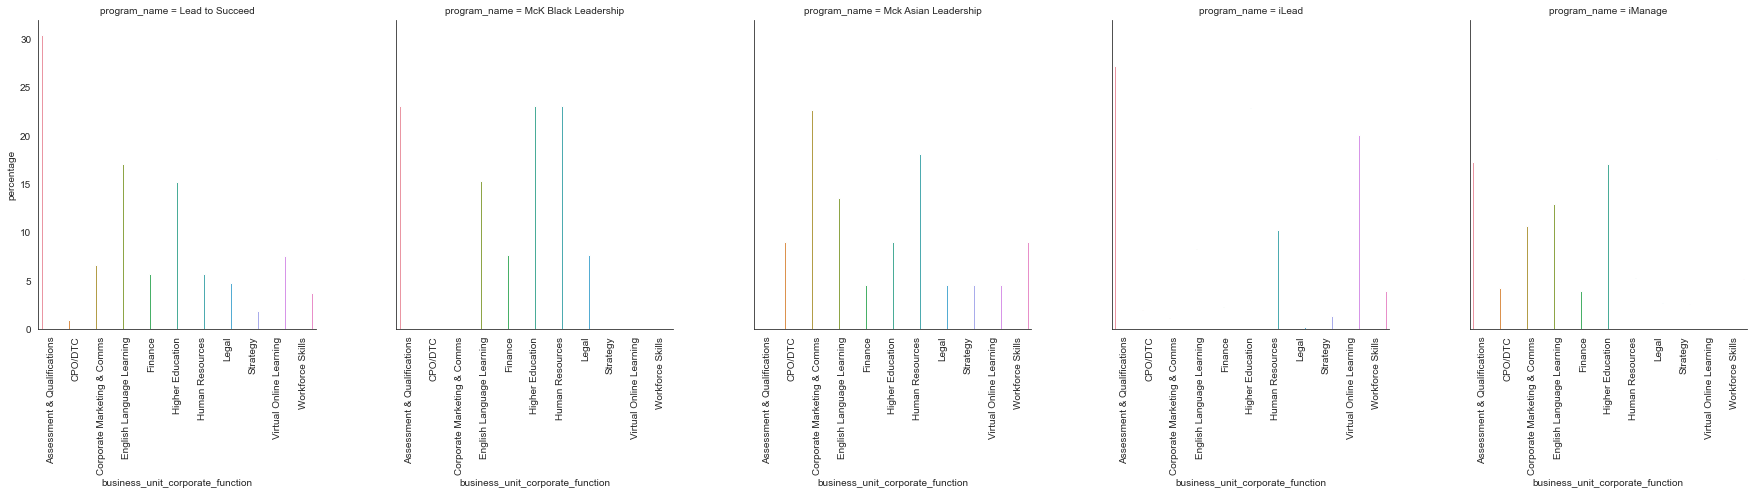

In [84]:
# graph of talent review status percentages for each graph
# show percentage by ethnicity? gender?

sns.set_style('white')

ax = sns.catplot(x='business_unit_corporate_function', y='percentage', hue='business_unit_corporate_function',
                     col='program_name', data=corp_funct_by_prgm_count, kind='bar')
ax.set_xticklabels(rotation=90)

plt.show()

# EDA FOR Imanage

In [ ]:
results_df.head()